In [11]:
%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [13]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from DarkNews import const
from DarkNews import Cfourvec as Cfv
from DarkNews import plot_tools as pt

from alp.models import ALP
from alp.models import F_lepton_2body
from alp.models import Gamma_tau
from alp import plot_tools as pt
Gamma_tau

2.267350867723045e-12

/Users/mhostert/Repos/tau_LLPs/alp/models.py:282: RuntimeWarning: invalid value encountered in sqrt
  def Gamma_a_to_NN(self):


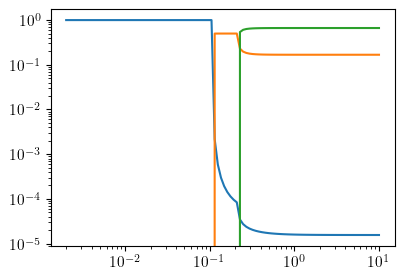

In [14]:
fa = 1e9
malps = np.geomspace(2e-3, 1e1, 100)
alps = ALP(malps, fa)

plt.loglog(malps, alps.Gamma_a_to_ee()/alps.Gamma_a)
plt.loglog(malps, alps.Gamma_a_to_me()/alps.Gamma_a)
plt.loglog(malps, alps.Gamma_a_to_mm()/alps.Gamma_a)



In [18]:
ALP(0.5, 1e5).BR_a_to_em + ALP(0.5, 1e5).BR_a_to_me

np.float64(0.3371424049433755)

In [19]:
ma_limit, B_limit_90CL = np.genfromtxt("data/digitized/BelleII_tau_to_mu_a.dat", unpack=True)
B_limit_90CL_interp = np.interp(0.2, ma_limit, B_limit_90CL, left=1e100, right=1e100)
B_limit_90CL_interp

np.float64(0.000634)

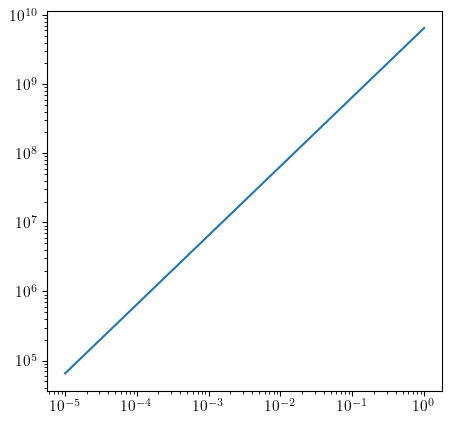

In [20]:
Npoints = 100
ma_fixed = 0.5
fig, ax = pt.std_fig(figsize=(5,5))
Bvis = np.linspace(1e-5, 1, Npoints, endpoint=True)
alp = ALP(ma_fixed, 1e10, c_NN=0, mN=0, Bvis=Bvis)
ctau0 = const.get_decay_rate_in_cm(alp.Gamma_a)
ax.plot(Bvis, ctau0)

ax.set_yscale('log')
ax.set_xscale('log')    

In [24]:
def make_ctau_plot(inv_fa_range=[0.5e-9,1e-4], ma_range=[1e-2, const.m_tau - const.m_e*1.01], Npoints=101, c_lepton=False, name='', c_NN=0, mN=0):

    fig, ax = pt.std_fig(figsize=(5,5))
    inv_fas = np.geomspace(*inv_fa_range, Npoints, endpoint=True)
    m_alps = np.geomspace(*ma_range, Npoints, endpoint=True)
    MA, INV_FA = np.meshgrid(m_alps, inv_fas)


    alp = ALP(MA, 1/INV_FA, c_NN=c_NN, mN=mN, Bvis=1)
    Z = const.get_decay_rate_in_cm(alp.Gamma_a)
    print(Z.min(), Z.max())
    ax.contour(MA, INV_FA, np.log10(Z), levels=100, cmap='Blues', linestyles='-', linewidths=[1], alpha=1, zorder=2)

    ax.set_yscale('log')
    ax.set_xscale('log')    

def make_ctau_plot_Bvis(inv_fa_range=[0.5e-9,1e-4], Bvis_range=[1e-12, 1], Npoints=101, c_lepton=False, name='', c_NN=0, mN=0, ma_fixed=0.3):

    fig, ax = pt.std_fig(figsize=(5,5))
    inv_fas = np.geomspace(*inv_fa_range, Npoints, endpoint=True)
    Bvis = np.geomspace(*Bvis_range, Npoints, endpoint=True)
    X, Y = np.meshgrid(Bvis, inv_fas)
    alp = ALP(ma_fixed, 1/Y, c_NN=c_NN, mN=mN, Bvis=X)
    Z = const.get_decay_rate_in_cm(alp.Gamma_a)
    # X,Y,Z = pt.interp_grid(X.flatten(), Y.flatten(), Z.flatten(), logx=True, logy=True)
    ax.contour(X, Y, np.log10(Z), levels=20, cmap='Blues', linestyles='-', linewidths=[1], alpha=1, zorder=2)

    ax.set_yscale('log')
    ax.set_xscale('log')    

In [25]:
import scipy
smear_stddev=0.5
smear=False

/Users/mhostert/Repos/tau_LLPs/alp/models.py:282: RuntimeWarning: invalid value encountered in sqrt
  term2 = 1 - (m_l1 - m_l2) ** 2 / self.m_a**2
/Users/mhostert/Repos/tau_LLPs/alp/models.py:230: RuntimeWarning: invalid value encountered in divide
  else:
/Users/mhostert/Repos/tau_LLPs/alp/models.py:231: RuntimeWarning: invalid value encountered in divide
  self.BR_a_to_ee = self.Gamma_a_to_ee() / self.Gamma_a * (self.Gamma_a > 0)
/Users/mhostert/Repos/tau_LLPs/alp/models.py:232: RuntimeWarning: invalid value encountered in divide
  self.BR_a_to_me = self.Gamma_a_to_me() / self.Gamma_a * (self.Gamma_a > 0)
/Users/mhostert/Repos/tau_LLPs/alp/models.py:233: RuntimeWarning: invalid value encountered in divide
  self.BR_a_to_em = self.Gamma_a_to_em() / self.Gamma_a * (self.Gamma_a > 0)
/Users/mhostert/Repos/tau_LLPs/alp/models.py:234: RuntimeWarning: invalid value encountered in divide
  self.BR_a_to_mm = self.Gamma_a_to_mm() / self.Gamma_a * (self.Gamma_a > 0)
/Users/mhostert/Repos/tau_L

(0.01, 3)

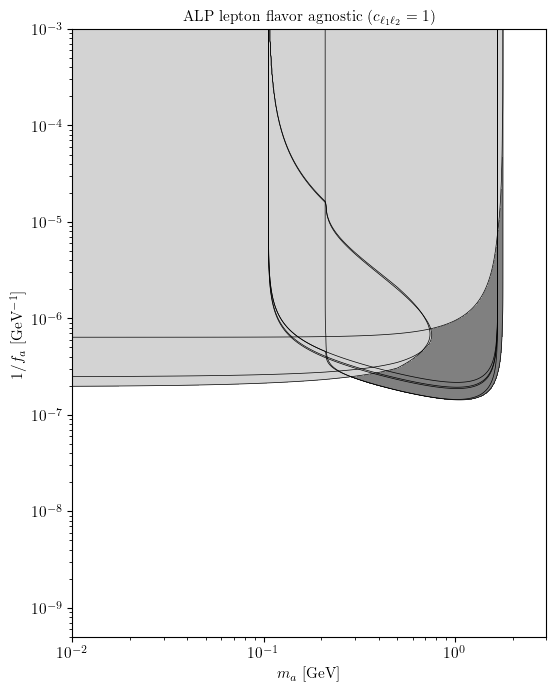

In [31]:
fig, ax = pt.std_fig(figsize=(6,8))

name = 'anarchy'
lamb = 1
c_lepton = np.array([[1, lamb**2, lamb], 
                     [lamb**2, 1, lamb],
                     [lamb, lamb, 1]
                     ])

pt.plot_other_limits(ax, c_lepton=c_lepton, linewidth=0.5, c_NN=0, mN=0.0)

ax.set_yscale('log')
ax.set_xscale('log')
ax.set_ylabel(r'$1/f_a$ [GeV$^{-1}$]')
ax.set_xlabel(r'$m_a$ [GeV]')
ax.set_title(r'ALP lepton flavor agnostic ($c_{\ell_1 \ell_2}  = 1$)', fontsize=11)
# 
# ax.set_ylim(1e-10/2,1e-4)
ax.set_ylim(5e-10,1e-3)
# ax.set_xlim(const.m_mu,1.8)
ax.set_xlim(1e-2,3)


(1e-06, 1)

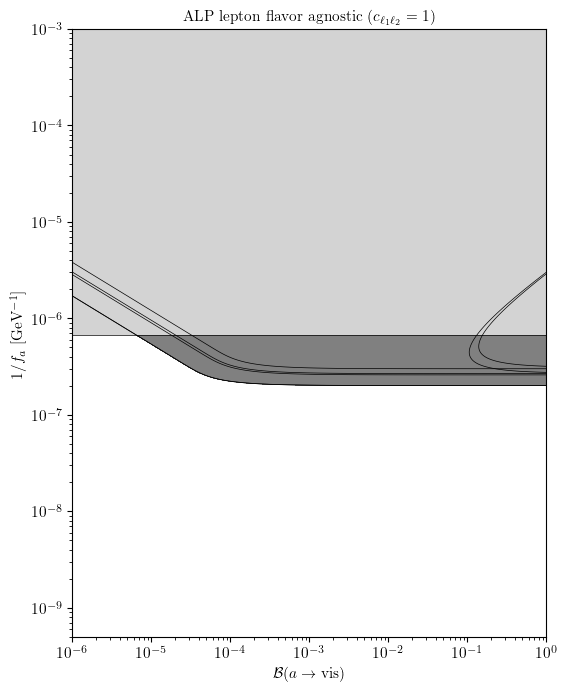

In [33]:
fig, ax = pt.std_fig(figsize=(6,8))

name = 'anarchy'
lamb = 1
c_lepton = np.array([[1, lamb**2, lamb], 
                     [lamb**2, 1, lamb],
                     [lamb, lamb, 1]
                     ])

pt.plot_other_limits_Bvis(ax, ma_fixed=0.4, c_lepton=c_lepton, linewidth=0.5, c_NN=0, mN=0.0)

ax.set_yscale('log')
ax.set_xscale('log')
ax.set_ylabel(r'$1/f_a$ [GeV$^{-1}$]')
ax.set_xlabel(r'$\mathcal{B}(a \to {\rm vis})$')
ax.set_title(r'ALP lepton flavor agnostic ($c_{\ell_1 \ell_2}  = 1$)', fontsize=11)

# ax.set_ylim(1e-10/2,1e-4)
ax.set_ylim(5e-10,1e-3)
# ax.set_xlim(const.m_mu,1.8)
ax.set_xlim(1e-6,1)



In [43]:
def main_plot(BP_NAME, c_lepton, c_NN, mN, fa_power=1, figsize=(5,5), smear=False, ymax=1e-3, ymin=1e-10, xmin=1e-2, xmax=2, ncol=1, loc='lower left', yscale='log', xscale='log', legend=True, name_modifier='', vlines=True):
    
    fig, ax = pt.std_fig(figsize=figsize)

    pt.plot_other_limits(ax, c_lepton=c_lepton, c_NN=c_NN, mN=mN, linewidth=0.0)

    # labels for legend
    labels = []
    labelnames = []
    name=BP_NAME

    Nsig = 2.3
    X,Y,Z = np.load(f'data/CHARM_rates{name}.npy', allow_pickle=True)
    if smear: 
        Z = scipy.ndimage.filters.gaussian_filter(Z, smear_stddev, mode="nearest", order=0, cval=0)
    c = ax.contourf(X, Y**fa_power, Z, levels=[Nsig, 1e100], colors=[pt.lighten_color(pt.CB_color_cycle[0], 0.5)], alpha=1, zorder=-0.2)
    _ = ax.contour(X, Y**fa_power, Z, levels=[Nsig], colors=pt.CB_color_cycle[0], linestyles='-', linewidths=[1], alpha=1, zorder=2)
    labels.append(c.legend_elements()[0][0])
    labelnames.append('CHARM')

    X,Y,Z = np.load(f'data/BEBC_rates{name}.npy', allow_pickle=True)
    c = ax.contourf(X, Y**fa_power, Z, levels=[Nsig, 1e100], colors=[pt.lighten_color(pt.CB_color_cycle[1], 0.5)], alpha=1, zorder=-0.1)
    _ = ax.contour(X, Y**fa_power, Z, levels=[Nsig], colors=pt.CB_color_cycle[1], linestyles='-', linewidths=[1], alpha=1, zorder=2)
    labels.append(c.legend_elements()[0][0])
    labelnames.append('BEBC')


    # X,Y,Z = np.load(f'data/NA62_rates{name}.npy', allow_pickle=True)
    # c = ax.contourf(X, Y, Z, levels=[Nsig, 1e100], colors=[pt.lighten_color('firebrick', 0.85)], alpha=1, zorder=1.1)
    # _ = ax.contour(X, Y, Z, levels=[Nsig], colors='firebrick', linestyles='-', linewidths=[1], alpha=1, zorder=2)
    # labels.append(c.legend_elements()[0][0])
    # labelnames.append(r'NA62 ($1.4\times 10^{17}$ POT)')


    X,Y,Z = np.load(f'data/NoVA_rates{name}.npy', allow_pickle=True)
    # c = ax.contourf(X, Y**fa_power, Z, levels=[Nsig, 1e100], colors=[pt.lighten_color('darkorange', 0.5)], alpha=1, zorder=1.3)
    c = ax.contour(X, Y**fa_power, Z, levels=[Nsig], colors=pt.CB_color_cycle[0], linestyles=[(1,(2,1))], linewidths=[1.75], alpha=1, zorder=2)
    labels.append(c.legend_elements()[0][0])
    labelnames.append('NOvA')

    X,Y,Z = np.load(f'data/MicroBooNE_rates{name}.npy', allow_pickle=True)
    # c = ax.contourf(X, Y**fa_power, Z, levels=[Nsig, 1e100], colors=[pt.lighten_color('black', 0.5)], alpha=1, zorder=1.2)
    c = ax.contour(X, Y**fa_power, Z, levels=[Nsig], colors=pt.CB_color_cycle[1], linestyles=[(1,(4,1,))], linewidths=[1.75], alpha=1, zorder=2)
    labels.append(c.legend_elements()[0][0])
    labelnames.append('$\mu$BooNE (NuMI)')

    X,Y,Z = np.load(f'data/ICARUS_rates{name}.npy', allow_pickle=True)
    if smear: 
        Z = scipy.ndimage.filters.gaussian_filter(Z, smear_stddev, mode='constant', order=0, cval=0)
    # c = ax.contourf(X, Y**fa_power, Z, levels=[Nsig, 1e100], colors=[pt.lighten_color('black', 0.5)], alpha=1, zorder=1.1)
    c = ax.contour(X, Y**fa_power, Z, levels=[Nsig], colors=pt.CB_color_cycle[0], linestyles=[(1,(6,0))], linewidths=[1.75], alpha=1, zorder=2)
    labels.append(c.legend_elements()[0][0])
    labelnames.append('ICARUS (NuMI)')


    X1,Y1,Z1 = np.load(f'data/ProtoDUNE-NP02_rates{name}.npy', allow_pickle=True)
    _,_,Z2 = np.load(f'data/ProtoDUNE-NP02_rates{name}.npy', allow_pickle=True)
    X,Y,Z = X1, Y1, Z1+Z2
    if smear: 
        Z = scipy.ndimage.filters.gaussian_filter(Z, smear_stddev, mode="nearest", order=0, cval=0)
    c = ax.contour(X, Y**fa_power, Z, levels=[Nsig], colors='lightgreen', linestyles=[(1,(3,2))], linewidths=[1.75], alpha=1, zorder=2)
    labels.append(c.legend_elements()[0][0])
    labelnames.append(r'Proto-DUNE')

    X,Y,Z = np.load(f'data/FASER_rates{name}.npy', allow_pickle=True)
    if smear: 
        Z = scipy.ndimage.filters.gaussian_filter(Z, 2*smear_stddev, mode="nearest", order=0, cval=0)
    # c = ax.contourf(X, Y**fa_power, Z, levels=[Nsig, 1e100], colors=[pt.lighten_color='black', 0.95)], alpha=1, zorder=1.91)
    c = ax.contour(X, Y**fa_power, Z, levels=[Nsig], colors='black', linestyles=[(0,(2,2))], linewidths=[1.5], alpha=1, zorder=2)
    labels.append(c.legend_elements()[0][0])
    labelnames.append('FASER')

    X,Y,Z = np.load(f'data/FASER2_rates{name}.npy', allow_pickle=True)
    if smear: 
        Z = scipy.ndimage.filters.gaussian_filter(Z, smear_stddev, mode="nearest", order=0, cval=0)
    c = ax.contour(X, Y**fa_power, Z, levels=[Nsig], colors='black', linestyles=[(1,(5,1))], linewidths=[1.5], alpha=1, zorder=2)
    labels.append(c.legend_elements()[0][0])
    labelnames.append(r'FASER-2')
    

    X,Y,Z = np.load(f'data/SHiP_rates{name}.npy', allow_pickle=True)
    if smear: 
        Z = scipy.ndimage.filters.gaussian_filter(Z, smear_stddev, mode="nearest", order=0, cval=0)
    c = ax.contour(X, Y**fa_power, Z, levels=[Nsig], colors='black', linestyles='-', linewidths=[1.75], alpha=1, zorder=2)
    # x,y = c.collections[0].get_paths()[0].vertices[:,0],c.collections[0].get_paths()[0].vertices[:,1]
    # # x=np.append([1e-2], x)
    # # y=np.append([1e-2], y)
    # x,y=pt.plot_closed_region((x,y), logx=True, logy=True)
    # c = ax.plot(x,y, edgecolor='black', facecolor='None', linestyle='-', linewidth=1.75, alpha=1, zorder=2)
    # labels.append(c[0])
    labels.append(c.legend_elements()[0][0])
    labelnames.append(r'SHiP')

    if legend:
        ax.legend(labels, labelnames, loc=loc, fontsize=8.5, ncol=ncol, frameon=True, framealpha=0.8, edgecolor='black', fancybox=False, handlelength=2.5, handletextpad=0.5, labelspacing=0.5, borderpad=0.5)

    
    if c_lepton[0,0] != c_lepton[0,2]:
        title=r'{\bf LFV hierarchy} $\,\,\vert\,\,$'
        # ax.annotate(r'\noindent \bf LFV hierarchy', xy=(0.02, 0.98), xycoords='axes fraction', fontsize=11, ha='left', va='top')
        title+=rf'$g_{{\ell \ell}} = {int(c_lepton[0,0])}$'
        # title+=rf'$\,\,\vert\,\, g_{{(e,\mu)\tau}} = \lambda$'
        # title+=rf'$\,\,\vert\,\, g_{{e\mu}} = \lambda^2 $'
        # title+=rf'$\,\,\vert\,\, \lambda = {pt.sci_notation(c_lepton[1,2], notex=True, precision=1)}$'
        title+=rf'$\,\,\vert\,\, g_{{(e,\mu)\tau}} = {pt.sci_notation(c_lepton[1,2], notex=True, precision=1)}$'
    
    elif c_lepton[0,0] == c_lepton[0,2]:
        title=r'{\bf LFV anarchy} $\,\,\vert\,\,$'
        # ax.annotate(r'\noindent \bf LFV anarchy', xy=(0.02, 0.98), xycoords='axes fraction', fontsize=11, ha='left', va='top')
        title+=rf'$g_{{\ell_1 \ell_2}} = {int(c_lepton[0,0])}$'    
    
    ax.set_yscale(yscale)
    ax.set_xscale(xscale)
    ax.set_ylabel(rf'$f_a^{{{-fa_power}}}$ [GeV$^{{{-fa_power}}}$]')
    ax.set_xlabel(r'$m_a$ [GeV]')

    # ax.set_ylim(1e-10/2,1e-4)
    ax.set_ylim(ymin**fa_power,ymax**fa_power)
    ax.set_xlim(xmin,xmax)

    # ax.vlines(const.m_tau - const.m_e, ymin, ymax, color='black', linestyle='--', lw=0.5)
    # ax.annotate(r'$m_{\tau} - m_e$', (1.1*(const.m_tau - const.m_e), ymax/1.1), fontsize=9.5, ha='center', va='top', rotation=90)

    # ax.vlines(const.m_tau - const.m_mu, ymin, ymax, color='black', linestyle='--', lw=0.5)
    # ax.annotate(r'$m_{\tau} - m_\mu$', (0.92*(const.m_tau - const.m_mu), ymax/1.1), fontsize=9.5, ha='center', va='top', rotation=90)

    if vlines:
        ax.vlines(2*const.m_mu, ymin, ymax, color='grey', linestyle='--', lw=0.5)
        ax.annotate(r'$2 m_\mu$', (0.92*(2*const.m_mu), ymin*1.1), fontsize=9.5, ha='center', va='bottom', rotation=90, color='grey')

        ax.vlines(const.m_mu+const.m_e, ymin, ymax, color='grey', linestyle='--', lw=0.5)
        ax.annotate(r'$m_\mu + m_e$', (0.92*(const.m_mu+const.m_e), ymin*1.1), fontsize=9.5, ha='center', va='bottom', rotation=90, color='grey')

    # title+=rf'$\,\vert\, m_{{\psi}} = {mN}$'
    # ax.grid(which='both')

    ax.set_title(title, fontsize=11, pad=7.5)

    fig.savefig(f'plots/ALP_benchmark_{name}{name_modifier}.pdf', bbox_inches='tight', dpi=400)



/Users/mhostert/Repos/tau_LLPs/alp/plot_tools.py:1007: RuntimeWarning: invalid value encountered in multiply
  BR_tau_mu_a = 1 / B_limit_90CL * P_decay * alps.BR_tau_to_a_mu() * alps.BR_a_to_em
/Users/mhostert/Repos/tau_LLPs/alp/plot_tools.py:1007: RuntimeWarning: overflow encountered in multiply
  BR_tau_mu_a = 1 / B_limit_90CL * P_decay * alps.BR_tau_to_a_mu() * alps.BR_a_to_em
/Users/mhostert/Repos/tau_LLPs/alp/plot_tools.py:981: RuntimeWarning: overflow encountered in multiply
  BR_tau_mu_a = 1 / B_limit_90CL * P_decay * alps.BR_tau_to_a_mu() * alps.BR_a_to_me
/Users/mhostert/Repos/tau_LLPs/alp/plot_tools.py:981: RuntimeWarning: invalid value encountered in multiply
  BR_tau_mu_a = 1 / B_limit_90CL * P_decay * alps.BR_tau_to_a_mu() * alps.BR_a_to_me


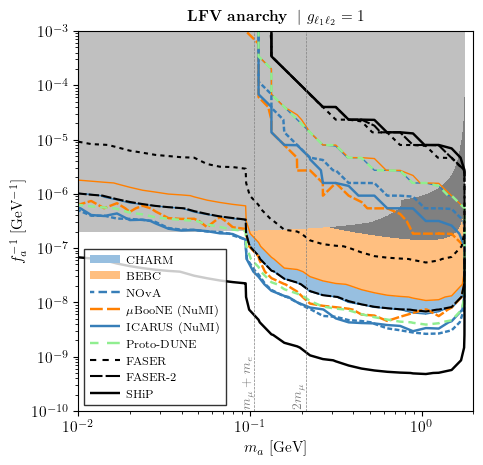

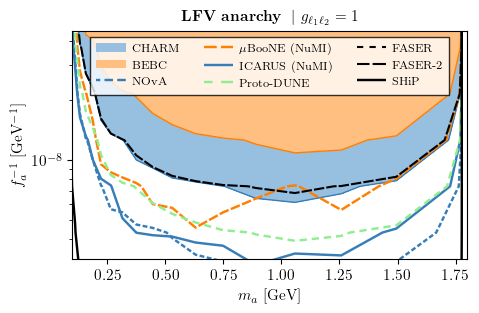

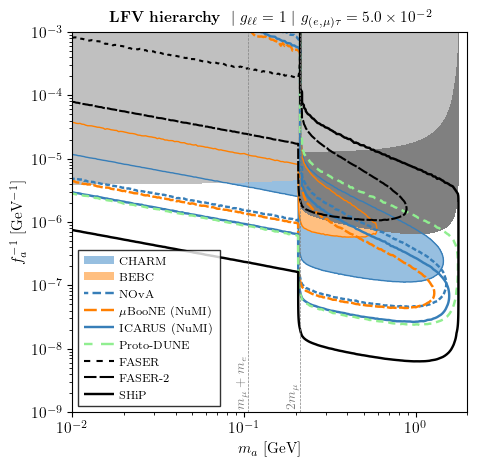

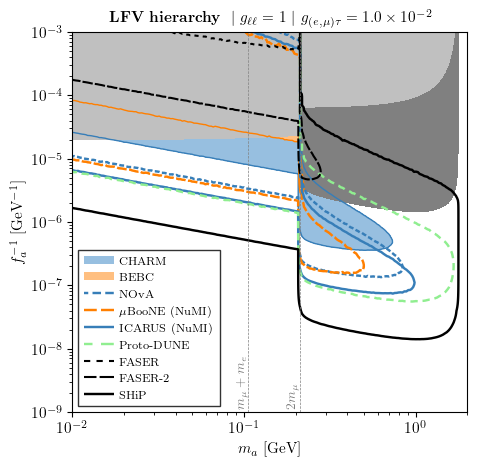

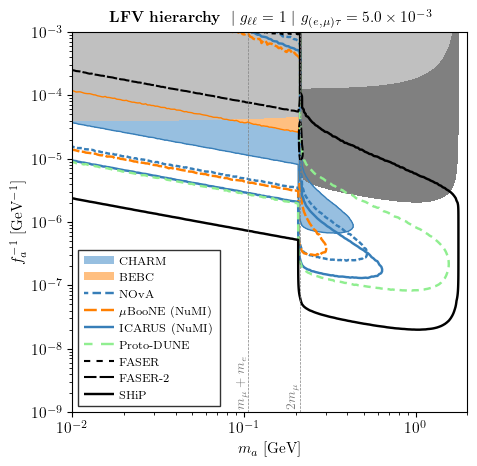

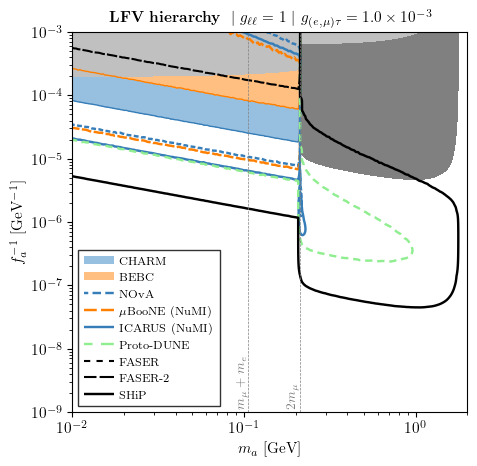

In [44]:
BP_NAME = 'anarchy'
lamb = 1
c_lepton = np.array([[1, 1, 1], 
                     [1, 1, 1], 
                     [1, 1, 1]])
main_plot(BP_NAME, c_lepton, 0, 0, ymin=1e-10, figsize=(5,5))
main_plot(BP_NAME, c_lepton, 0, 0, fa_power=1, ymin=np.sqrt(1e-17), ymax=np.sqrt(2e-15), xmin=0.1, xmax=1.8, ncol=3, loc='upper center', figsize=(5,3), xscale='linear', legend=True, name_modifier='_fa4', vlines=False)


for lam in [0.05,0.01,0.005,0.001]:
    BP_NAME = f'hierarchy_lambda_{lam}_clep_1'
    lamb = lam
    C_LEPTON = 1
    c_lepton = C_LEPTON*np.array([[1,    lamb**2, lamb], 
                        [lamb**2, 1,       lamb], 
                        [lamb, lamb, 1]])
    main_plot(BP_NAME, c_lepton, 0, 0, ymin=1e-9, ymax=1e-3)

In [1063]:
def make_Bvis_plot(BP_NAME, c_lepton, c_NN, mN, ma_fixed, smear=False, ymax=1e-3, ymin=1e-10):
    
    fig, ax = pt.std_fig(figsize=(5,5))

    pt.plot_other_limits_Bvis(ax, ma_fixed=ma_fixed, c_lepton=c_lepton, c_NN=c_NN, mN=mN, linewidth=0.0)

    # labels for legend
    labels = []
    labelnames = []
    name=BP_NAME

    Nsig = 2.3
    X,Y,Z = np.load(f'data/invfa_vs_Bvis_CHARM_rates_{name}.npy', allow_pickle=True)
    if smear: 
        Z = scipy.ndimage.filters.gaussian_filter(Z, smear_stddev, mode="nearest", order=0, cval=0)
    X,Y,Z = pt.interp_grid(X.flatten(), Y.flatten(), Z.flatten(), logx=True, logy=True)
    c = ax.contourf(X, Y, Z, levels=[Nsig, 1e100], colors=[pt.lighten_color(pt.CB_color_cycle[0], 0.5)], alpha=1, zorder=1.5)
    _ = ax.contour(X, Y, Z, levels=[Nsig], colors=pt.CB_color_cycle[0], linestyles='-', linewidths=[1], alpha=1, zorder=2)
    labels.append(c.legend_elements()[0][0])
    labelnames.append('CHARM')

    X,Y,Z = np.load(f'data/invfa_vs_Bvis_BEBC_rates_{name}.npy', allow_pickle=True)
    X,Y,Z = pt.interp_grid(X.flatten(), Y.flatten(), Z.flatten(), logx=True, logy=True)
    c = ax.contourf(X, Y, Z, levels=[Nsig, 1e100], colors=[pt.lighten_color(pt.CB_color_cycle[1], 0.5)], alpha=1, zorder=1.4)
    _ = ax.contour(X, Y, Z, levels=[Nsig], colors=pt.CB_color_cycle[1], linestyles='-', linewidths=[1], alpha=1, zorder=2)
    labels.append(c.legend_elements()[0][0])
    labelnames.append('BEBC')


    # X,Y,Z = np.load(f'data/NA62_rates{name}.npy', allow_pickle=True)
    # c = ax.contourf(X, Y, Z, levels=[Nsig, 1e100], colors=[pt.lighten_color('firebrick', 0.85)], alpha=1, zorder=1.1)
    # _ = ax.contour(X, Y, Z, levels=[Nsig], colors='firebrick', linestyles='-', linewidths=[1], alpha=1, zorder=2)
    # labels.append(c.legend_elements()[0][0])
    # labelnames.append(r'NA62 ($1.4\times 10^{17}$ POT)')


    X,Y,Z = np.load(f'data/invfa_vs_Bvis_NoVA_rates_{name}.npy', allow_pickle=True)
    X,Y,Z = pt.interp_grid(X.flatten(), Y.flatten(), Z.flatten(), logx=True, logy=True)
    # c = ax.contourf(X, Y, Z, levels=[Nsig, 1e100], colors=[pt.lighten_color('darkorange', 0.5)], alpha=1, zorder=1.3)
    c = ax.contour(X, Y, Z, levels=[Nsig], colors=pt.CB_color_cycle[0], linestyles=[(1,(2,1))], linewidths=[1.25], alpha=1, zorder=2)
    labels.append(c.legend_elements()[0][0])
    labelnames.append('NOvA')

    X,Y,Z = np.load(f'data/invfa_vs_Bvis_MicroBooNE_rates_{name}.npy', allow_pickle=True)
    X,Y,Z = pt.interp_grid(X.flatten(), Y.flatten(), Z.flatten(), logx=True, logy=True)
    # c = ax.contourf(X, Y, Z, levels=[Nsig, 1e100], colors=[pt.lighten_color('black', 0.5)], alpha=1, zorder=1.2)
    c = ax.contour(X, Y, Z, levels=[Nsig], colors=pt.CB_color_cycle[1], linestyles=[(1,(4,1))], linewidths=[1.25], alpha=1, zorder=2)
    labels.append(c.legend_elements()[0][0])
    labelnames.append('$\mu$BooNE (NuMI)')

    X,Y,Z = np.load(f'data/invfa_vs_Bvis_ICARUS_rates_{name}.npy', allow_pickle=True)
    if smear: 
        Z = scipy.ndimage.filters.gaussian_filter(Z, smear_stddev, mode='constant', order=0, cval=0)
    X,Y,Z = pt.interp_grid(X.flatten(), Y.flatten(), Z.flatten(), logx=True, logy=True)
    # c = ax.contourf(X, Y, Z, levels=[Nsig, 1e100], colors=[pt.lighten_color('black', 0.5)], alpha=1, zorder=1.1)
    c = ax.contour(X, Y, Z, levels=[Nsig], colors=pt.CB_color_cycle[0], linestyles=[(1,(6,0))], linewidths=[1.25], alpha=1, zorder=2)
    labels.append(c.legend_elements()[0][0])
    labelnames.append('ICARUS (NuMI)')


    X1,Y1,Z1 = np.load(f'data/invfa_vs_Bvis_ProtoDUNE-NP02_rates_{name}.npy', allow_pickle=True)
    _,_,Z2 = np.load(f'data/invfa_vs_Bvis_ProtoDUNE-NP02_rates_{name}.npy', allow_pickle=True)
    X,Y,Z = X1, Y1, Z1+Z2
    if smear: 
        Z = scipy.ndimage.filters.gaussian_filter(Z, smear_stddev, mode="nearest", order=0, cval=0)
    X,Y,Z = pt.interp_grid(X.flatten(), Y.flatten(), Z.flatten(), logx=True, logy=True)
    c = ax.contour(X, Y, Z, levels=[Nsig], colors='lightgreen', linestyles=[(1,(3,2))], linewidths=[1.25], alpha=1, zorder=2)
    labels.append(c.legend_elements()[0][0])
    labelnames.append(r'Proto-DUNE')

    X,Y,Z = np.load(f'data/invfa_vs_Bvis_FASER_rates_{name}.npy', allow_pickle=True)
    if smear: 
        Z = scipy.ndimage.filters.gaussian_filter(Z, 2*smear_stddev, mode="nearest", order=0, cval=0)
    X,Y,Z = pt.interp_grid(X.flatten(), Y.flatten(), Z.flatten(), logx=True, logy=True)
    # c = ax.contourf(X, Y, Z, levels=[Nsig, 1e100], colors=[pt.lighten_color='black', 0.95)], alpha=1, zorder=1.91)
    c = ax.contour(X, Y, Z, levels=[Nsig], colors='black', linestyles=[(1,(2,0.5))], linewidths=[1.5], alpha=1, zorder=2)
    labels.append(c.legend_elements()[0][0])
    labelnames.append('FASER')

    X,Y,Z = np.load(f'data/invfa_vs_Bvis_FASER2_rates_{name}.npy', allow_pickle=True)
    if smear: 
        Z = scipy.ndimage.filters.gaussian_filter(Z, smear_stddev, mode="nearest", order=0, cval=0)
    X,Y,Z = pt.interp_grid(X.flatten(), Y.flatten(), Z.flatten(), logx=True, logy=True)
    c = ax.contour(X, Y, Z, levels=[Nsig], colors='black', linestyles=[(1,(5,1))], linewidths=[1.5], alpha=1, zorder=2)
    labels.append(c.legend_elements()[0][0])
    labelnames.append(r'FASER-2')

    X,Y,Z = np.load(f'data/invfa_vs_Bvis_SHiP_rates_{name}.npy', allow_pickle=True)
    if smear: 
        Z = scipy.ndimage.filters.gaussian_filter(Z, smear_stddev, mode="nearest", order=0, cval=0)
    X,Y,Z = pt.interp_grid(X.flatten(), Y.flatten(), Z.flatten(), logx=True, logy=True)
    c = ax.contour(X, Y, Z, levels=[Nsig], colors='black', linestyles='-', linewidths=[1.75], alpha=1, zorder=2)
    # x,y = c.collections[0].get_paths()[0].vertices[:,0],c.collections[0].get_paths()[0].vertices[:,1]
    # # x=np.append([1e-2], x)
    # # y=np.append([1e-2], y)
    # x,y=pt.plot_closed_region((x,y), logx=True, logy=True)
    # c = ax.plot(x,y, edgecolor='black', facecolor='None', linestyle='-', linewidth=1.75, alpha=1, zorder=2)
    # labels.append(c[0])
    labels.append(c.legend_elements()[0][0])
    labelnames.append(r'SHiP')

    ax.legend(labels, labelnames, loc='upper left', fontsize=8.5, ncol=1, frameon=True, framealpha=0.8, edgecolor='black', fancybox=False, handlelength=2.5, handletextpad=0.5, labelspacing=0.5, borderpad=0.5)

    if c_lepton[0,0] != c_lepton[0,2]:
        title=r'{\bf LFV hierarchy} $\,\,\vert\,\,$'
        title+=rf'$g_{{\ell \ell}} = {int(c_lepton[0,0])}$'
        title+=rf'$\,\,\vert\,\, g_{{(e,\mu)\tau}} = \lambda$'
        title+=rf'$\,\,\vert\,\, g_{{e\mu}} = \lambda^2 $'
        title+=rf'$\,\,\vert\,\, \lambda = {pt.sci_notation(c_lepton[1,2], notex=True, precision=1)}$'
    
    elif c_lepton[0,0] == c_lepton[0,2]:
        title=r'{\bf LFV anarchy} $\,\,\vert\,\,$'
        # ax.annotate(r'\noindent \bf LFV anarchy \\ $\tau$ limits only', xy=(0.02, 0.98), xycoords='axes fraction', fontsize=11, ha='left', va='top')
        title+=rf'$g_{{\ell_1 \ell_2}} = {int(c_lepton[0,0])}$'
    
    title+=rf'$\,\vert\, m_a = {ma_fixed}$~GeV'
    
    
    ax.set_yscale('log')
    ax.set_xscale('log')
    ax.set_ylabel(r'$1/f_a$ [GeV$^{-1}$]')
    ax.set_xlabel(r'$\mathcal{B}(a \to {\rm vis}) = 1 - \mathcal{B}(a\to \text{dark sector})$')
    ax.set_ylim(ymin,ymax)
    # ax.set_xlim(X.min(), 1)
    ax.set_xlim(1e-6, 1)

    ax.set_title(title, fontsize=11, pad=10)
    # ax.invert_xaxis()
    # ax.set_xticklabels(ax.get_xticklabels()[::-1])
    fig.savefig(f'plots/ALP_benchmark_{name}_Bvis.pdf', bbox_inches='tight', dpi=400)

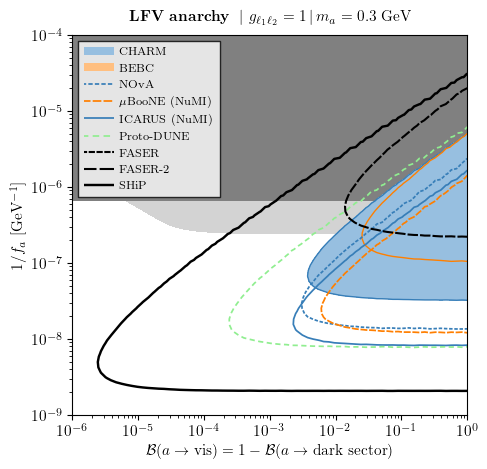

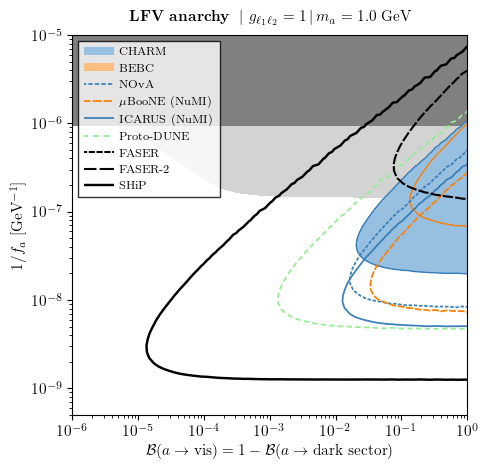

In [1065]:
lamb = 1
c_lepton = np.array([[1, 1, 1], 
                     [1, 1, 1], 
                     [1, 1, 1]])

BP_NAME = f'anarchy_inv_ma_0.3'
make_Bvis_plot(BP_NAME, c_lepton, 0 , 0, ma_fixed=0.3, ymin=1e-9, ymax=1e-4)

BP_NAME = f'anarchy_inv_ma_1.0'
make_Bvis_plot(BP_NAME, c_lepton, 0, 0, ma_fixed=1.0, ymin=5e-10, ymax=1e-5)
